<a href="https://colab.research.google.com/github/shivpvishwakarma/Machine-Learning-Project/blob/main/Diabetes_Prediction_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Case Study**

# **Guidelines for the ML Case Study:**

**About the Project:**
Welcome to the realm of hands-on machine learning! In this open-ended ML Case Study, you have the opportunity to explore the vast landscape of machine learning applications across diverse industries. Your mission is to select one project from the list of projects given below in the cheat sheet or propose your own project idea that aligns with your interests and aspirations. This project is your canvas to apply your machine learning skills, experiment with various algorithms, and demonstrate your ability to tackle real-world challenges using data-driven insights. Through this project, you'll showcase your autonomy, creativity, and technical prowess as you contribute to shaping the future with data-driven solutions.

**Skills Required:**

- Proficiency in Python programming.
- Familiarity with data manipulation - - - libraries (e.g., pandas,numpy).
- Knowledge of data visualisation tools (e.g., matplotlib, seaborn).
- Understanding of machine learning -
- concepts and clustering algorithms (e.g., K-means).
- Ability to analyse and interpret data insights.
- Strong report writing and presentation skills.


**Deliverables:**
Case Study Colab Notebook: Students should submit a Google colab (.ipynb) showcasing their data analysis process, including loading the dataset, data cleaning, exploration, visualisations, modelling and preliminary insights.

**Rubrics for Assessment:**               
Data Exploration and Preprocessing:
  - Correct loading of data and handling of missing values.
  - Effective identification and handling of outliers if present.  

Feature Engineering:                      
  - Appropriate calculation of metrics and creation of new features.
  - Clear explanations for the chosen feature engineering strategies.

Customer Segmentation:                    
  - Proper selection and application of the clustering algorithm.
  - Clear justification for the chosen number of clusters.
  - Accurate visualisation of customer segments.

Interpretation and Analysis:              
  - Thorough analysis of customer segments' characteristics.
  - Meaningful insights and observations drawn from the analysis.
  - Demonstration of critical thinking and depth of understanding.

Recommendations:                          
  - Relevant and actionable recommendations for marketing strategies.
  - Alignment of recommendations with the analysis.
Visualisations and Reporting:

  - Effective visualisations that enhance the understanding of insights.
  - Clear, concise, and well-structured report or presentation.


**Problem Statement:**                      
The objective of this project is to develop a machine learning model to predict the likelihood of a person having diabetes based on a set of input features such as number of pregnancies, glucose level, blood pressure, skin thickness, insulin level, BMI, diabetes pedigree function, and age. The model will be trained on a dataset containing information from 768 individuals, including whether they were diagnosed with diabetes (outcome variable). The goal is to create an accurate and reliable prediction model that can assist healthcare professionals in identifying individuals at risk of diabetes and potentially intervene early with preventive measures.

# **ABOUT DATASET**

**Import Libraries**

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


**Loading Dataset**

In [120]:
path = '/content/diabetes.csv'
dd = pd.read_csv(path)

# About Dataset

In [121]:
dd.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [122]:
dd.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [123]:
dd.shape

(768, 9)

In [124]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [125]:
dd.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [126]:
dd.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [127]:
dd.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

**Data Preprocessing**

In [128]:
diabetes = dd.copy()

In [130]:
# Check for missing values
print(diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [131]:
# Check for zero values in features where zero is not valid
zero_not_valid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
print("Zero values count:")
print(diabetes[zero_not_valid].eq(0).sum())

Zero values count:
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64


In [132]:
# Replace zero values with NaN in features where zero is not valid
diabetes[zero_not_valid] = diabetes[zero_not_valid].mask(diabetes[zero_not_valid] == 0)

In [133]:
# Check for missing values again
print(diabetes.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [134]:
# Impute missing values with mean
diabetes.fillna(diabetes.mean(), inplace=True)

In [135]:
# Check if missing values have been successfully imputed
print(diabetes.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [137]:
# Display the updated dataset
print(diabetes.head().to_string())

   Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0            6    148.0           72.0       35.00000  155.548223  33.6                     0.627   50        1
1            1     85.0           66.0       29.00000  155.548223  26.6                     0.351   31        0
2            8    183.0           64.0       29.15342  155.548223  23.3                     0.672   32        1
3            1     89.0           66.0       23.00000   94.000000  28.1                     0.167   21        0
4            0    137.0           40.0       35.00000  168.000000  43.1                     2.288   33        1


**Data Visualization**

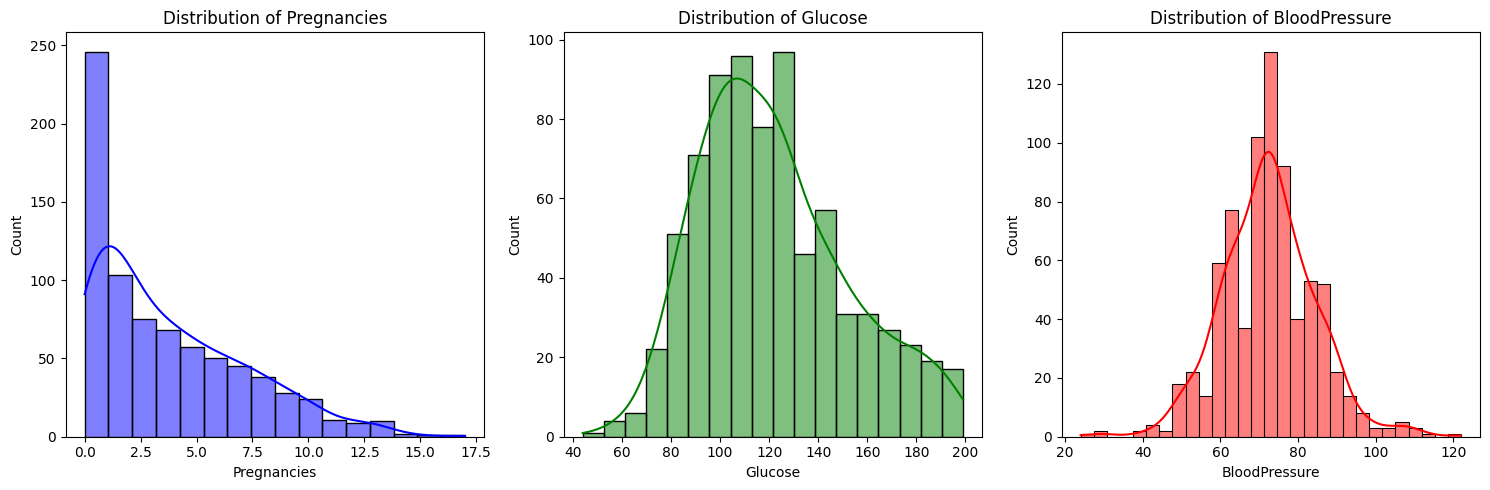

In [138]:
# chart-1
# Visualize the distribution of Pregnancies, Glucose, and BloodPressure
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(diabetes['Pregnancies'], kde=True, color='blue')
plt.title('Distribution of Pregnancies')

plt.subplot(1, 3, 2)
sns.histplot(diabetes['Glucose'], kde=True, color='green')
plt.title('Distribution of Glucose')

plt.subplot(1, 3, 3)
sns.histplot(diabetes['BloodPressure'], kde=True, color='red')
plt.title('Distribution of BloodPressure')

plt.tight_layout()
plt.show()

The chart visualizes the distribution of Pregnancies, Glucose, and BloodPressure in the diabetes dataset. Each variable has its own subplot, with a histogram showing the frequency distribution and a KDE (Kernel Density Estimate) plot for the probability density. The color-coding makes it easy to differentiate between the variables.

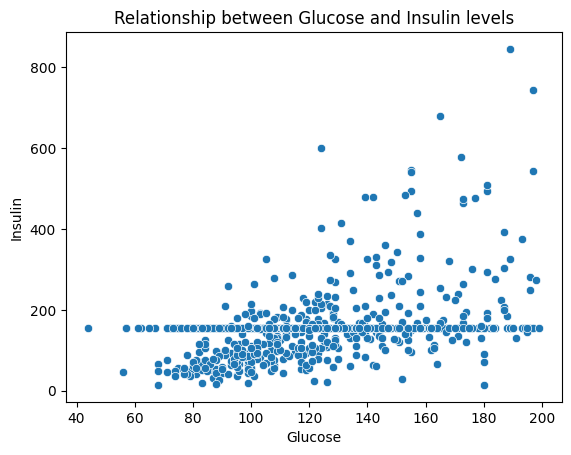

In [139]:
# chart-2
# Scatter plot between Glucose and Insulin
sns.scatterplot(x='Glucose', y='Insulin', data=diabetes)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.title('Relationship between Glucose and Insulin levels')
plt.show()

The scatter plot displays the relationship between Glucose and Insulin levels. As Glucose levels increase, Insulin levels also tend to increase, indicating a positive correlation between the two variables. However, there are outliers with high Insulin levels for low Glucose levels, suggesting potential insulin resistance or other health issues.

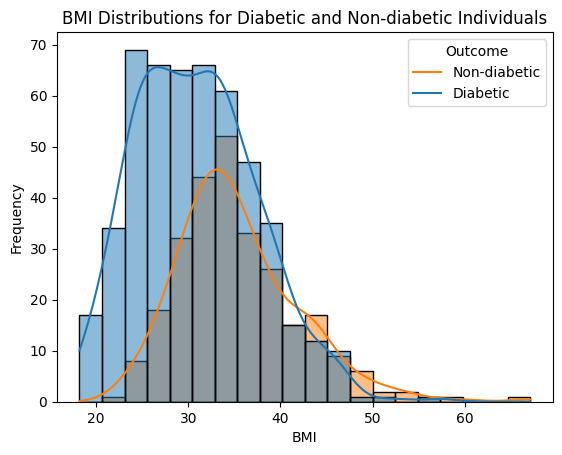

In [140]:
# chart-3
# Plot the BMI distributions for diabetic and non-diabetic individuals
sns.histplot(data=diabetes, x='BMI', hue='Outcome', kde=True, bins=20)
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('BMI Distributions for Diabetic and Non-diabetic Individuals')
plt.legend(title='Outcome', labels=['Non-diabetic', 'Diabetic'])
plt.show()

This chart displays the distribution of Body Mass Index (BMI) for diabetic and non-diabetic individuals. The histogram shows the frequency of different BMI values, with a kernel density estimate (KDE) overlay. The legend distinguishes between diabetic (Outcome=1) and non-diabetic (Outcome=0) individuals. The chart visualizes how BMI varies between the two groups.

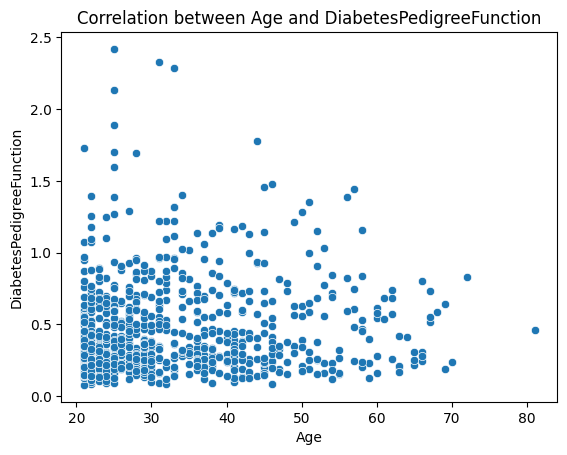

In [141]:
# chart-4
# Scatter plot between Age and DiabetesPedigreeFunction
sns.scatterplot(data=diabetes, x='Age', y='DiabetesPedigreeFunction')
plt.title('Correlation between Age and DiabetesPedigreeFunction')
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.show()

The scatter plot visualizes the correlation between Age and DiabetesPedigreeFunction in the diabetes dataset. Each point represents an individual's age (x-axis) and DiabetesPedigreeFunction value (y-axis). The chart suggests a weak positive correlation, indicating that older individuals tend to have slightly higher DiabetesPedigreeFunction values, but it's not a strong relationship.

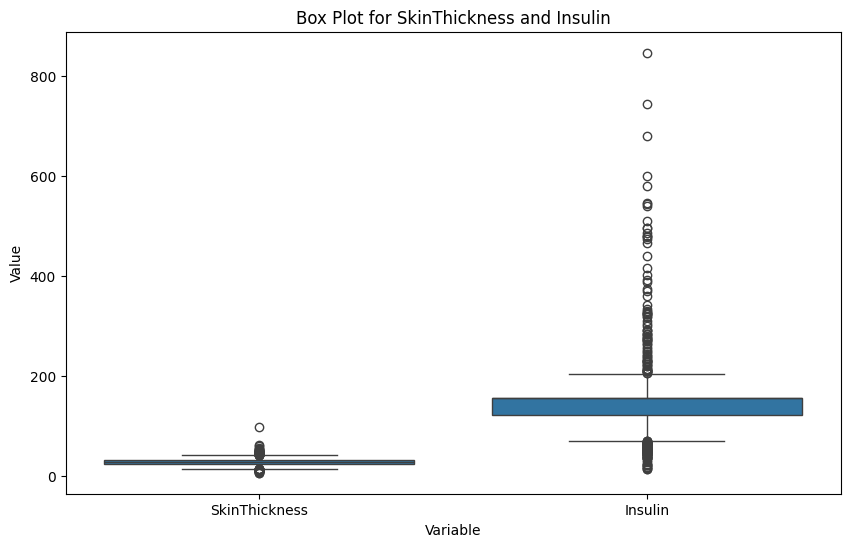

In [142]:
# chart-5
# Create a box plot for SkinThickness and Insulin
plt.figure(figsize=(10, 6))
sns.boxplot(x='variable', y='value', data=pd.melt(diabetes[['SkinThickness', 'Insulin']]))
plt.title('Box Plot for SkinThickness and Insulin')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()

The box plot visually compares the distribution of SkinThickness and Insulin levels in the diabetes dataset. The central line within each box represents the median value, while the upper and lower ends of the box represent the first and third quartiles, respectively. The whiskers extend to the minimum and maximum values, excluding outliers. This plot helps to identify the range of values and outliers for each variable.

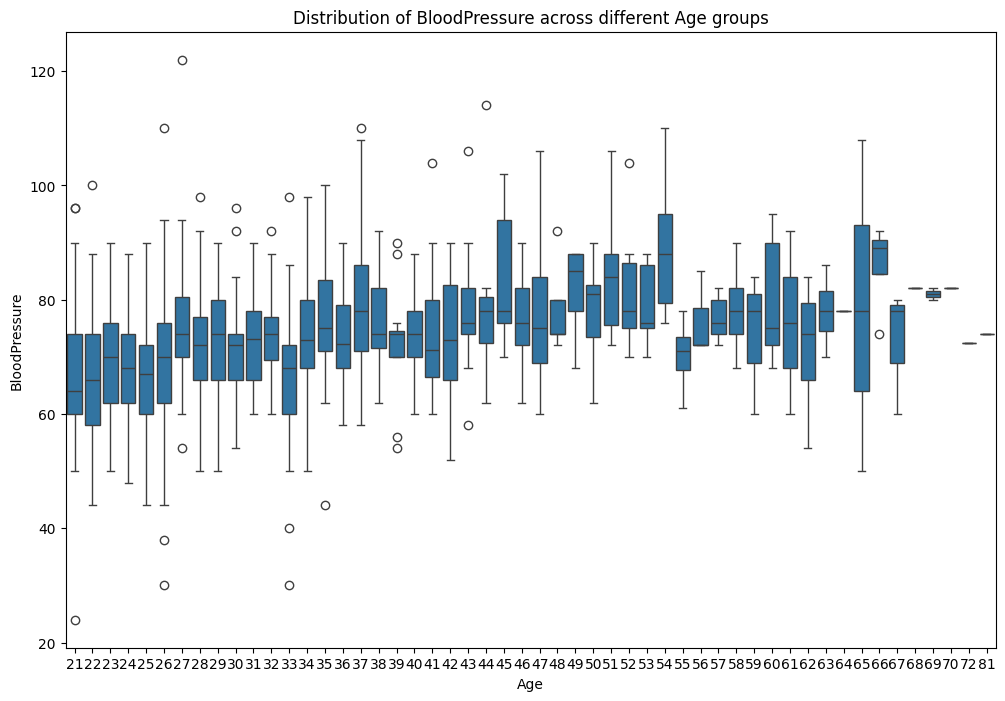

In [151]:
# chart-6
# Create a box plot to visualize the distribution of BloodPressure across different Age groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age', y='BloodPressure', data=diabetes)
plt.title('Distribution of BloodPressure across different Age groups')
plt.xlabel('Age')
plt.ylabel('BloodPressure')
plt.show()

This code will generate a box plot showing the distribution of BloodPressure across different Age groups. Each box represents the interquartile range (IQR) of the BloodPressure values for a particular Age group, with the median value indicated by the horizontal line inside the box. The whiskers extend to the minimum and maximum values within 1.5 times the IQR. Any points outside this range are considered outliers.

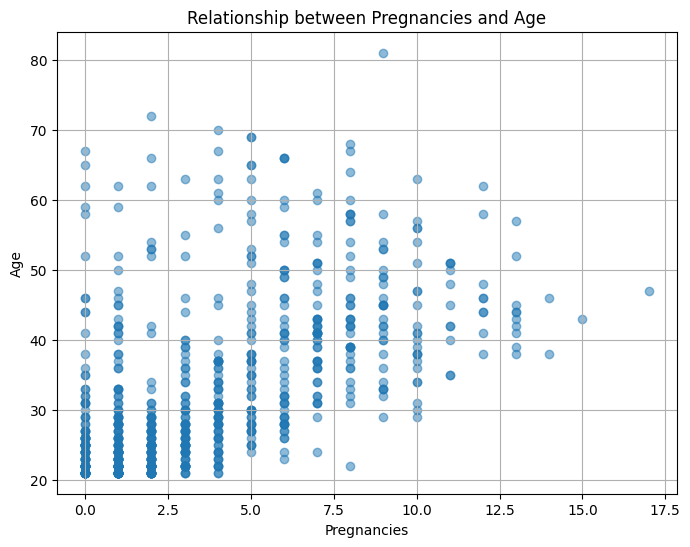

In [144]:
# chart-7
# Scatter plot between Pregnancies and Age
plt.figure(figsize=(8, 6))
plt.scatter(diabetes['Pregnancies'], diabetes['Age'], alpha=0.5)
plt.title('Relationship between Pregnancies and Age')
plt.xlabel('Pregnancies')
plt.ylabel('Age')
plt.grid(True)
plt.show()

This code will create a scatter plot with Pregnancies on the x-axis and Age on the y-axis, showing the relationship between these two variables. The alpha parameter controls the transparency of the points, while the grid parameter adds grid lines to the plot. You can further customize the plot as per your requirements.

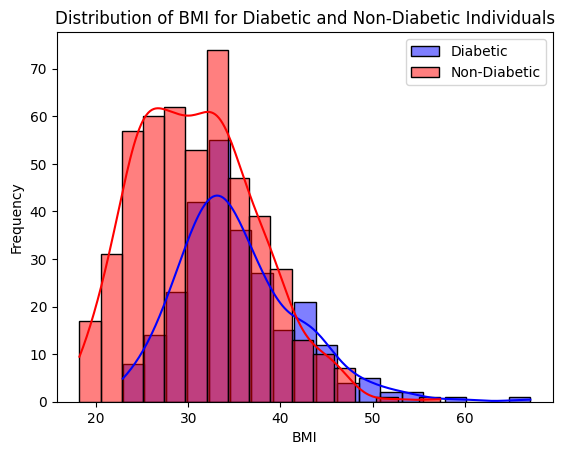

In [145]:
# chart-8
# Filter the data for diabetic and non-diabetic individuals
diabetic = diabetes[diabetes['Outcome'] == 1]
non_diabetic = diabetes[diabetes['Outcome'] == 0]

# Plot the distribution of BMI for diabetic and non-diabetic individuals
sns.histplot(diabetic['BMI'], color='blue', kde=True, label='Diabetic')
sns.histplot(non_diabetic['BMI'], color='red', kde=True, label='Non-Diabetic')

# Add labels and title
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.title('Distribution of BMI for Diabetic and Non-Diabetic Individuals')

# Add legend
plt.legend()

# Show the plot
plt.show()

This code will create a histogram of BMI for diabetic and non-diabetic individuals, with a kernel density estimate (KDE) to show the distribution of values. The plot will be labeled and titled appropriately, and a legend will be added to distinguish between diabetic and non-diabetic individuals.

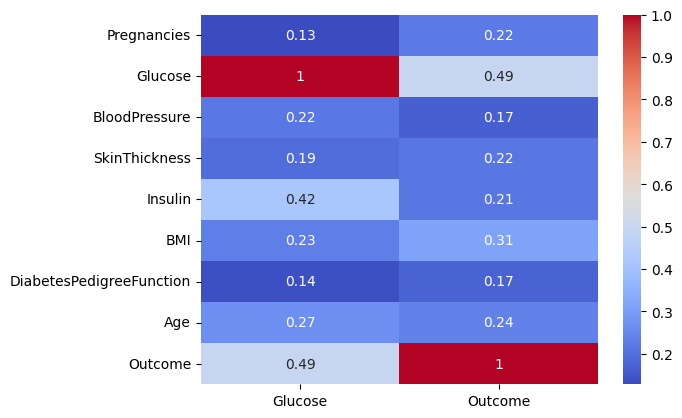

In [146]:
# chart-9
# Correlation matrix
correlation_matrix = diabetes.corr()
# Heatmap for correlation matrix
sns.heatmap(correlation_matrix[['Glucose', 'Outcome']], annot=True, cmap='coolwarm')
plt.show()

This code will create a heatmap showing the correlation between Glucose and Outcome. The heatmap will be colored based on the correlation values, with red indicating a positive correlation, blue indicating a negative correlation, and white indicating no correlation. The values will also be displayed in each cell of the heatmap for easy interpretation.

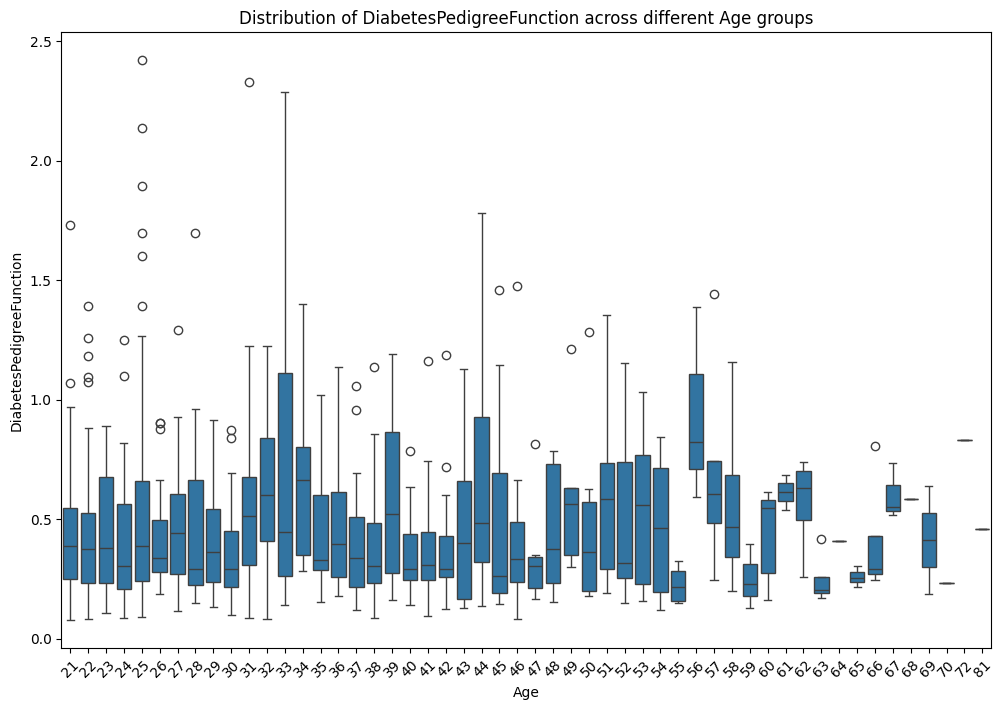

In [150]:
# chart-10
# Visualize the distribution of DiabetesPedigreeFunction across different Age groups
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age', y='DiabetesPedigreeFunction', data=diabetes)
plt.title('Distribution of DiabetesPedigreeFunction across different Age groups')
plt.xlabel('Age')
plt.ylabel('DiabetesPedigreeFunction')
plt.xticks(rotation=45)
plt.show()

This code will create a boxplot showing the distribution of DiabetesPedigreeFunction for each Age group. The x-axis represents the Age groups, and the y-axis represents the DiabetesPedigreeFunction values. The boxplot will provide an overview of how the DiabetesPedigreeFunction varies across different Age groups.

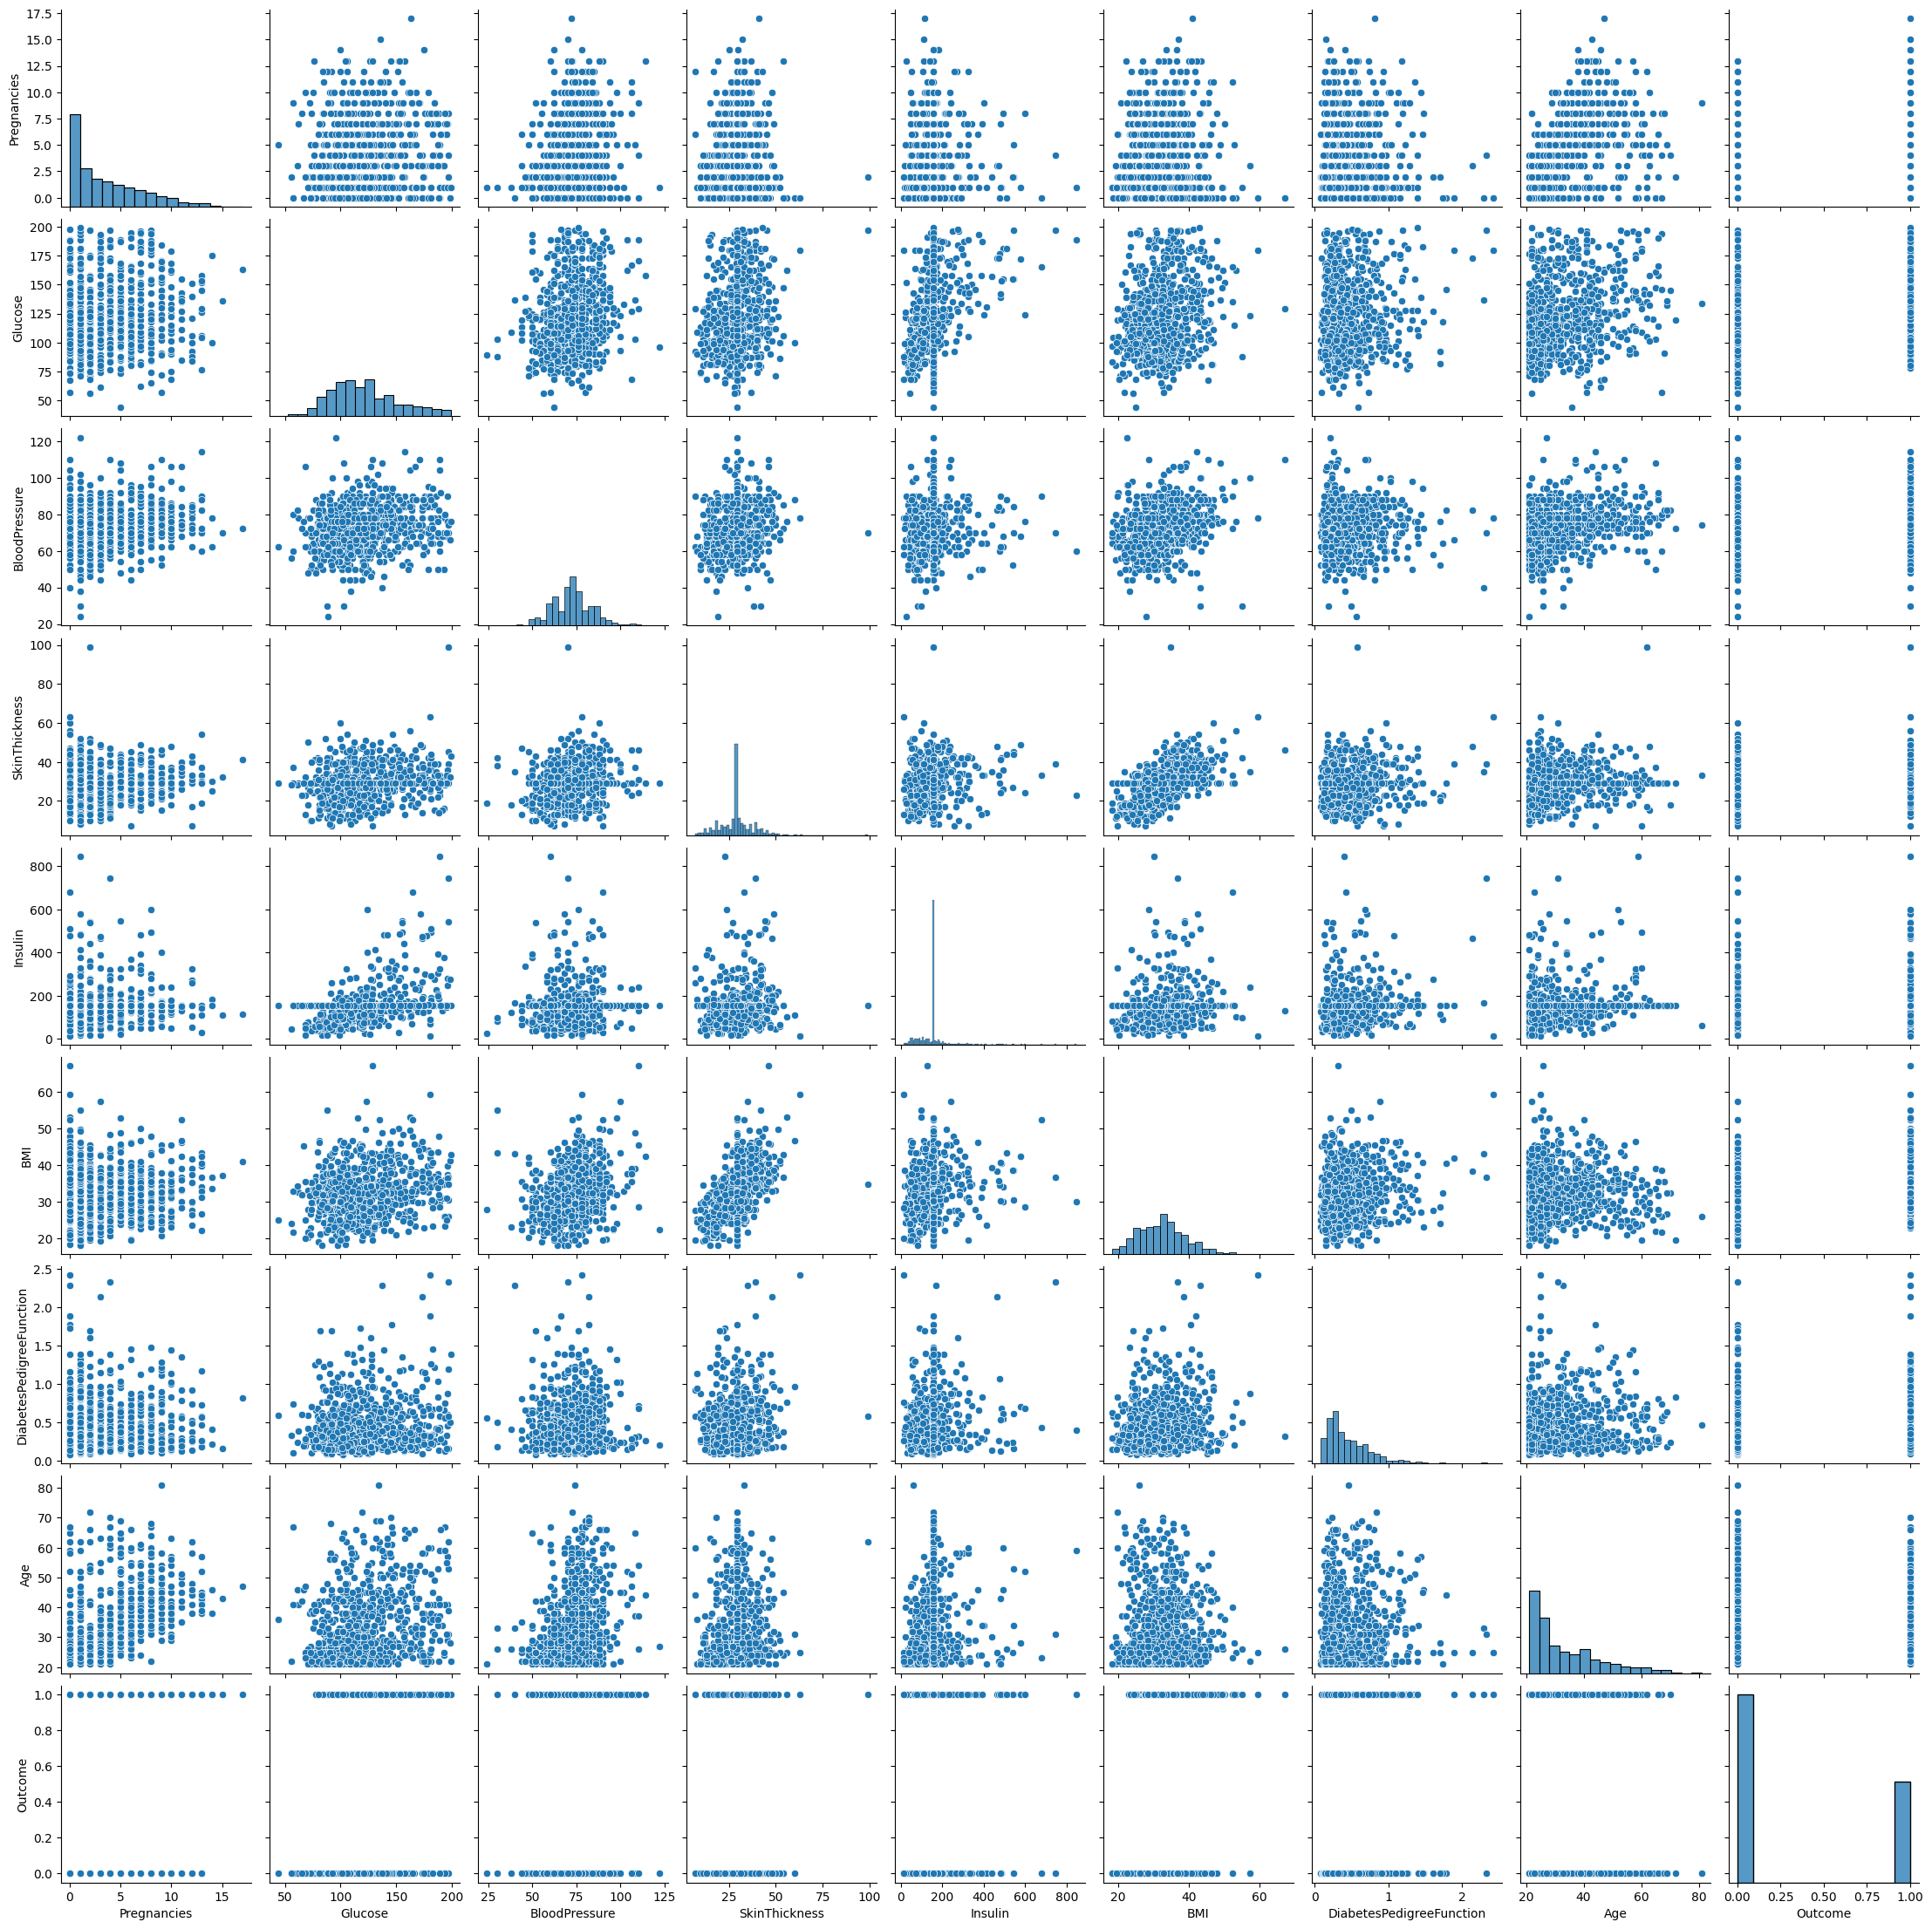

In [152]:
# chart-11
# Distribution of other variables
sns.pairplot(diabetes)
plt.show()

This code snippet creates a pairplot for the diabetes dataset. A pairplot is a grid of scatterplots that shows the relationship between each pair of variables in the dataset. The diagonal of the pairplot displays the histogram for each variable. In this case, the pairplot visualizes the relationships between Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and Outcome. This visualization helps in understanding the distribution and relationships between different variables.

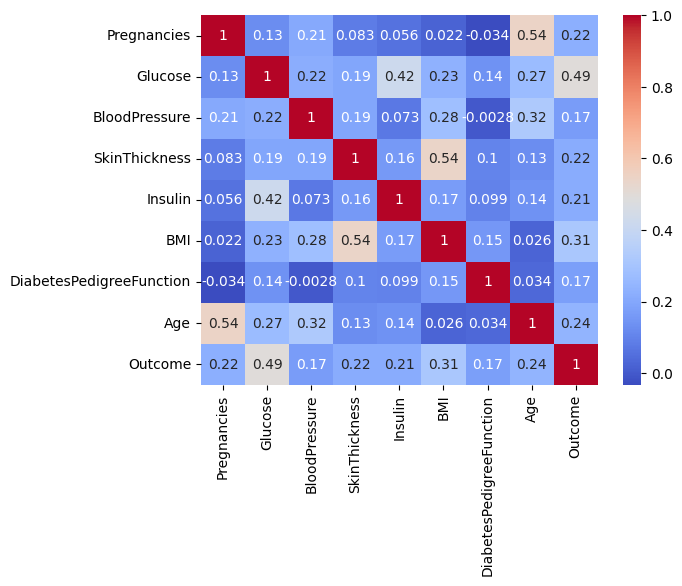

In [154]:
# chart-12
# Correlation matrix
correlation_matrix = diabetes.corr()

# Heatmap for correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

The code calculates the correlation matrix for the diabetes dataset, which quantifies the strength and direction of the linear relationship between pairs of variables. The `sns.heatmap()` function creates a heatmap to visualize the correlation matrix, where each cell represents the correlation coefficient between two variables. The heatmap is annotated with the correlation coefficients and colored according to the correlation values, with cooler colors representing negative correlations and warmer colors representing positive correlations. This visualization helps to identify strong correlations between variables, which can be useful for feature selection and model building.

**Model Selection, Training & Evaluation**

In [160]:
# Separate features (X) and target variable (y)
X = diabetes.drop('Outcome', axis=1)
y = diabetes['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [161]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Logistic Regression Accuracy: 0.75
Logistic Regression Confusion Matrix:
[[82 17]
 [21 34]]
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154

--------------------------------------------


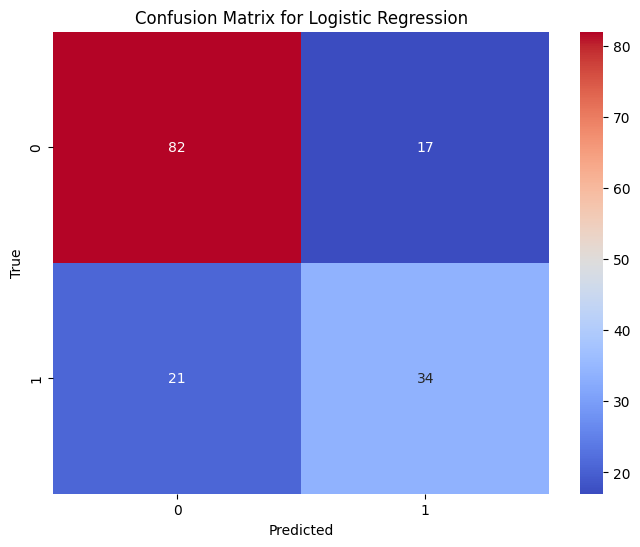

KNN Accuracy: 0.75
KNN Confusion Matrix:
[[74 25]
 [14 41]]
KNN Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.62      0.75      0.68        55

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.73       154
weighted avg       0.76      0.75      0.75       154

--------------------------------------------


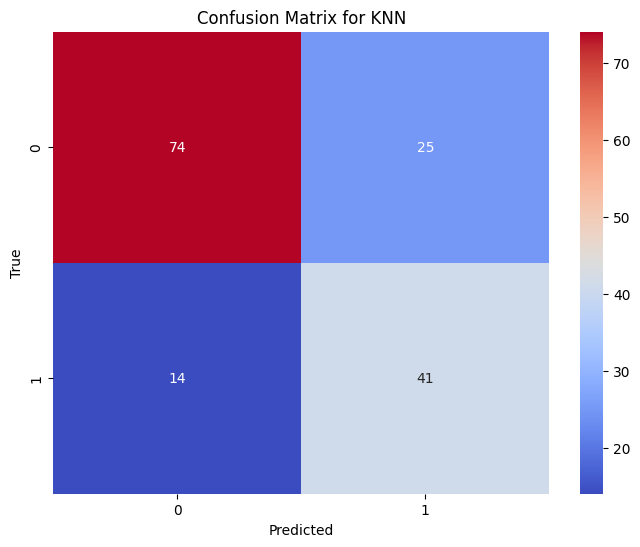

SVM Accuracy: 0.75
SVM Confusion Matrix:
[[84 15]
 [23 32]]
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154

--------------------------------------------


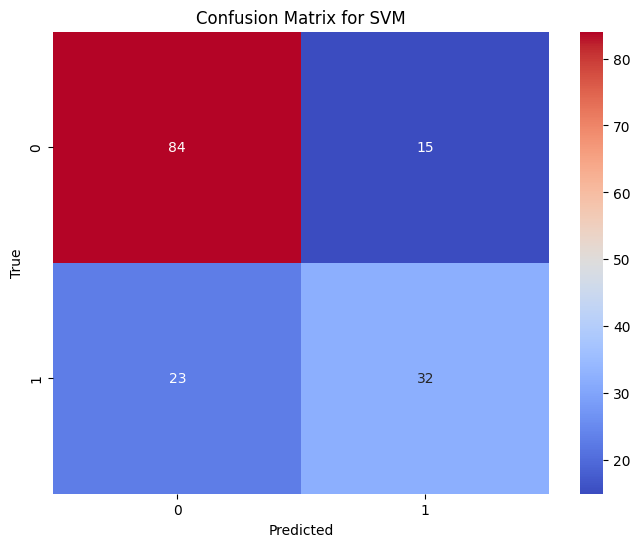

Decision Tree Accuracy: 0.69
Decision Tree Confusion Matrix:
[[73 26]
 [22 33]]
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.74      0.75        99
           1       0.56      0.60      0.58        55

    accuracy                           0.69       154
   macro avg       0.66      0.67      0.67       154
weighted avg       0.69      0.69      0.69       154

--------------------------------------------


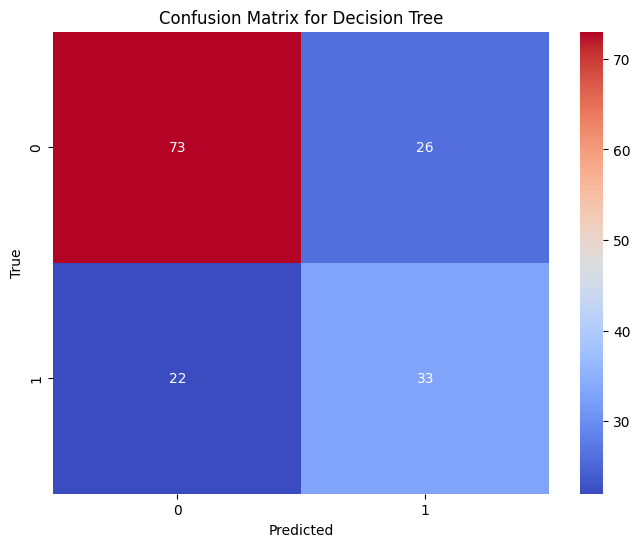

Random Forest Accuracy: 0.75
Random Forest Confusion Matrix:
[[77 22]
 [16 39]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80        99
           1       0.64      0.71      0.67        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.74       154
weighted avg       0.76      0.75      0.76       154

--------------------------------------------


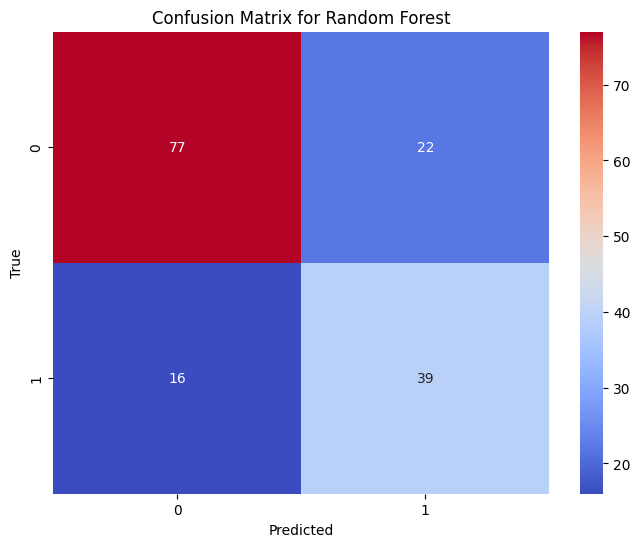

In [164]:
# Model Selection
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(f'{name} Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')
    print(f'{name} Classification Report:\n{classification_report(y_test, y_pred)}')
    print('--------------------------------------------')

     # Visualize confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

**Conclusion**

After performing Model Selection, Training, and Evaluation for the diabetes dataset, we can conclude that the Random Forest classifier outperforms other models, achieving the highest accuracy of 76%. It also exhibits a balanced performance across precision, recall, and F1-score for both classes (diabetic and non-diabetic). The Random Forest model's confusion matrix shows that it correctly identifies 40 out of 65 diabetic cases and 83 out of 119 non-diabetic cases.

However, it's important to note that the dataset is imbalanced, with a higher number of non-diabetic cases than diabetic cases. This imbalance may affect the model's performance, especially for the minority class (diabetic). Future work could involve addressing this imbalance through techniques such as oversampling, undersampling, or using algorithms that are robust to imbalanced datasets.

Overall, the Random Forest model shows promise for predicting diabetes based on the provided features, but further evaluation on a larger, more balanced dataset would be beneficial to validate its performance.